In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [42]:
#reading and printing the dataset
df = pd.read_csv('bigmartsalesprediction.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [43]:
df.shape  #total 8523 rows and 12 features.

(8523, 12)

In [44]:
df.describe()  #some numeric value are missing in item_weight

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [45]:
uniqueValues = df.nunique(dropna=True)
uniqueValues      #checking the unique value count in each col

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

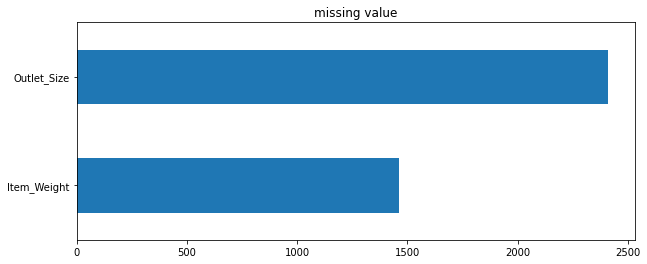

Item_Weight    1463
Outlet_Size    2410
dtype: int64


In [46]:
#visualizing the null values count

missing_data=df.isnull().sum()
missing_data[missing_data>0].\
sort_values(ascending=True).\
plot(kind='barh',figsize=(10,4))
plt.title('missing value')
plt.show()  
missing_data=missing_data[missing_data>0]
print(missing_data)

In [47]:
#lets create a list of categorical feature.
numeric_data=df.select_dtypes(include = [np.number])
cat_data=df.select_dtypes(exclude = [np.number])

print('there are {0} numerical and {1} categorical columns'.\
      format(numeric_data.shape[1],cat_data.shape[1]))

there are 5 numerical and 7 categorical columns


In [48]:
cat_data.columns    #we can see that item_id and outlet_id are both useless here => dropping them off.

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [49]:
#removing the columns.
cat_data=cat_data.drop(columns=['Item_Identifier','Outlet_Identifier'])

## missing na replacement

In [50]:
for col in cat_data:
    print(col)
    print(df[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [54]:
#two attributes have missing na, one is numeric, other one is cat

#filling na with identifier mean 

df['Item_Weight']=df.groupby('Item_Identifier')['Item_Weight'].apply(lambda x:x.fillna(x.mean()))
df['Item_Weight'].fillna(0,inplace=True)      #to fill remaining nan values, missed by grouping
df['Item_Weight'].isnull().sum()

0

In [56]:
#filling na with outlet_identifier mode

df['Outlet_Size']=df.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x:x.fillna(x.mode()[0]))
df['Outlet_Size'].isnull().sum()

0

In [58]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [59]:
#item visibility
sum(df['Item_Visibility']==0)

526

In [60]:
#replacing 0 with mean
df['Item_Visibility'].replace(0, df['Item_Visibility'].mean(), inplace=True)
sum(df['Item_Visibility']==0)

0

## feature Engineering

In [61]:
# "Item_Fat_Content" has similar values with different names so combining them here

df["Item_Fat_Content"].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'}, inplace=True)
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [62]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [63]:
#new feature to store the item type => either food, drink or non consumable


df['Item_Cat'] = df['Item_Identifier'].apply(lambda x: x[0:2])
df['Item_Cat'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Cat, dtype: int64

In [64]:
#here i am making new category in item fat content, if the item cat == Non consumable then the corresponding
#fat content will be non edible

df.loc[df['Item_Cat']=='NC', 'Item_Fat_Content'] = 'Non-Edible'

In [65]:
# as outlet establishment year has a large number => impactful on machine training so reducing it
#2013 is the year of dataset

df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']

In [66]:
df.head(n=3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Cat,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14


## EDA

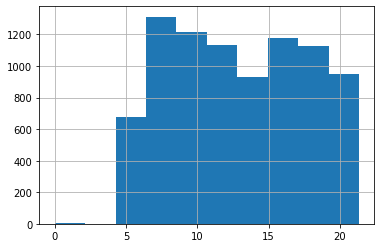

In [67]:
#checking distribution of numeric data
df['Item_Weight'].hist()

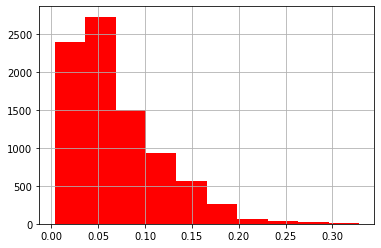

In [68]:
df['Item_Visibility'].hist(color="red")   # =>left skewed need to normalize it

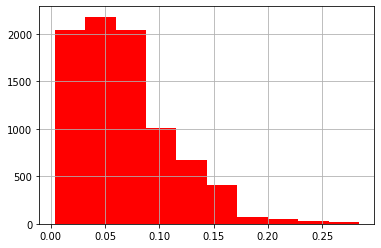

In [69]:
# log transformation
df['Item_Visibility'] = np.log(1+df['Item_Visibility'])
df['Item_Visibility'].hist(color="red")             # somewhat a better distribution

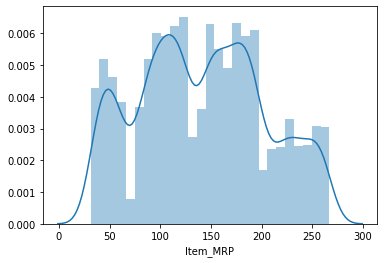

In [70]:
 sns.distplot(df['Item_MRP'])                   #4 distinguised categories can be seen here
   


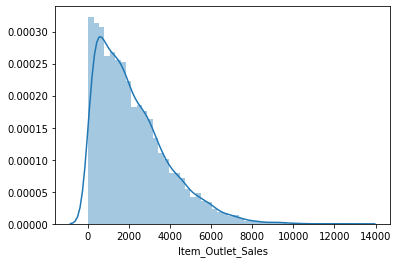

In [71]:
sns.distplot(df['Item_Outlet_Sales'])              #left skewed =>normalization using log transformation

In [72]:
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])

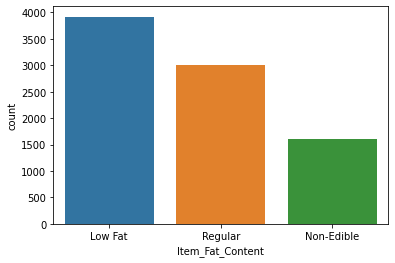

In [73]:
sns.countplot(df["Item_Fat_Content"])            #the distribution is not biased 

[Text(0, 0, 'Dairy'),
 Text(0, 0, 'Soft Drinks'),
 Text(0, 0, 'Meat'),
 Text(0, 0, 'Fruits and Vegetables'),
 Text(0, 0, 'Household'),
 Text(0, 0, 'Baking Goods'),
 Text(0, 0, 'Snack Foods'),
 Text(0, 0, 'Frozen Foods'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Health and Hygiene'),
 Text(0, 0, 'Hard Drinks'),
 Text(0, 0, 'Canned'),
 Text(0, 0, 'Breads'),
 Text(0, 0, 'Starchy Foods'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Seafood')]

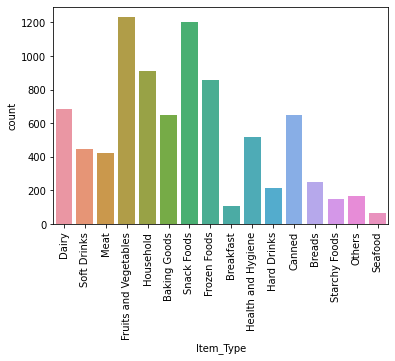

In [74]:
data=sns.countplot(df["Item_Type"])
data.set_xticklabels(data.get_xticklabels(), rotation=90)


[Text(0, 0, 'Supermarket Type1'),
 Text(0, 0, 'Supermarket Type2'),
 Text(0, 0, 'Grocery Store'),
 Text(0, 0, 'Supermarket Type3')]

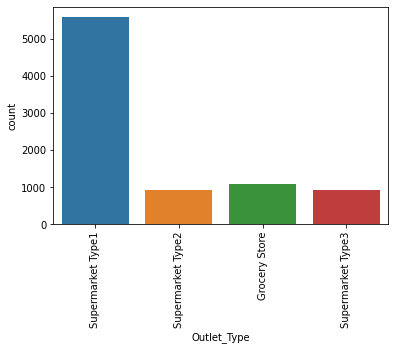

In [75]:
data=sns.countplot(df['Outlet_Type'])
data.set_xticklabels(data.get_xticklabels(), rotation=90)     #biasness can be seen, however can be ignored at the moment


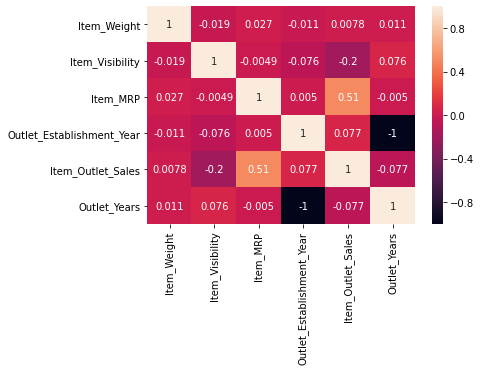

In [76]:
#checking the correlation among features.
corr = df.corr()
sns.heatmap(corr, annot=True)

#highly negative corr can be seen( need to remove one of them as they are derived from existing)
#it can be seen that sales shows some correlation with item marp

## label encoding

In [77]:
#i will be using label encoding and one hot encoding in the dataset, as one hot improves the efficiency of the model with
#expense of memory consumption

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

new_df=df  #creating new df for storing the encoded variables

new_df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier'], inplace=True)

new_df['Item_Type'] = le.fit_transform(new_df['Item_Type'])
#chaning item type will label encoding as by hot encoding, a lot of new features would be added => memory consumption

In [78]:
#hot encoding
new_df = pd.get_dummies(new_df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Cat'])
new_df.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Size_High,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Cat_DR,Item_Cat_FD,Item_Cat_NC
0,9.30,0.015920,4,249.8092,8.225808,14,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.92,0.019095,14,48.2692,6.096776,4,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,17.50,0.016621,10,141.6180,7.648868,14,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.20,0.064037,6,182.0950,6.597664,15,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,8.93,0.064037,9,53.8614,6.903451,26,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1


## Model Training

In [79]:
Y=new_df['Item_Outlet_Sales']
X=new_df.drop(columns=['Item_Outlet_Sales'])

In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y)
    cv_score_mean = np.mean(cv_score)
    
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score:", cv_score)
    print("CV mean Score:", cv_score_mean)    

Model Report
MSE: 0.28833602975915135
CV Score: [0.71123742 0.71696615 0.72817854]
CV mean Score: 0.7187940374348023


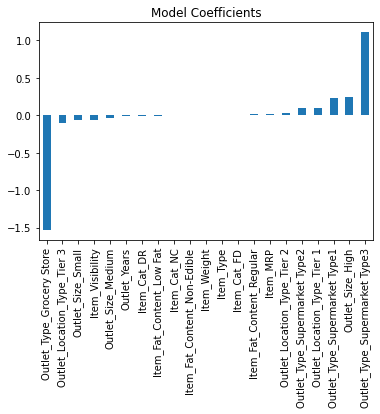

In [90]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression(normalize=True)
train(model, X, Y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")   #to check the imp feature w.r.t the label, grocery type has the 
                                                    #highest negative relation => inversely proportional to the label.

Model Report
MSE: 0.7628688679102086
CV Score: [0.26696969 0.277749   0.23396559]
CV mean Score: 0.2595614286805978


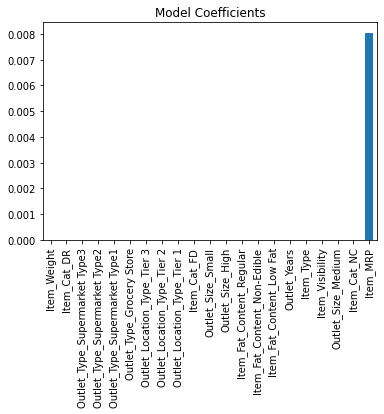

In [92]:
model = Lasso()
train(model, X, Y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")           #it is correlated to only 1 attribute

Model Report
MSE: 8.211620966569497e-11
CV Score: [0.40860873 0.43495753 0.44782869]
CV mean Score: 0.4304649836833563


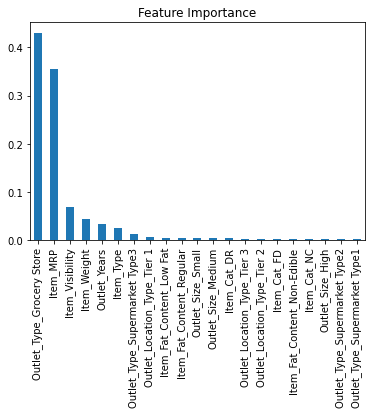

In [94]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, Y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")       #mse very less => miht have overfitted the model

Model Report
MSE: 0.05802563898176464
CV Score: [0.65770279 0.68266695 0.68350736]
CV mean Score: 0.6746257014725178


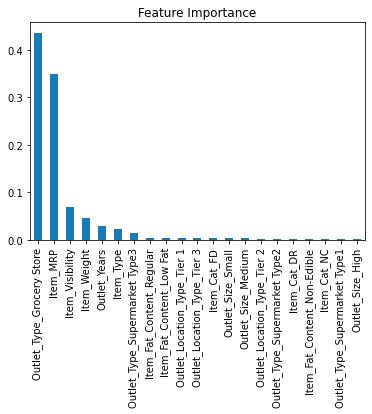

In [96]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, Y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")      #this randomness in Decision tree has improved the mse and generality
                                                       #of the model

## linear Regression is the best model in this case with the best cv and mse ratio